In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 


In [3]:
x0 = np.linspace(-5 , 5 , 200) #    1D diffusion 

In [4]:
image= cv2.imread('data/download.jpeg')
image= cv2.cvtColor(image , cv2.COLOR_BGR2RGB)



In [6]:
T=1000
beta = np.linspace(1e-3 , 0.05 , T) # linear noise schedule 
beta_cosine = np.cos(np.linspace(1e-3 , 0.05 , T))

alpha = 1-beta 
alpha_cosine = 1-beta_cosine

alpha_product = np.cumprod(alpha)
alpha_product_cosine = np.cumprod(alpha_cosine)

In [5]:
alpha.shape , alpha_product.shape 

((1000,), (1000,))

In [6]:
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

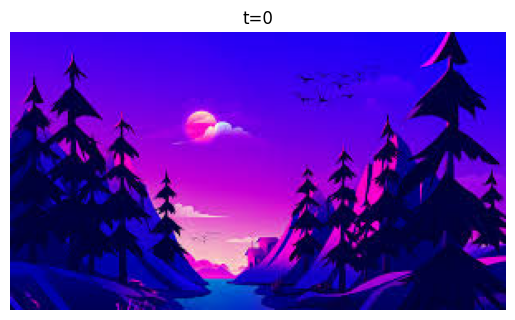

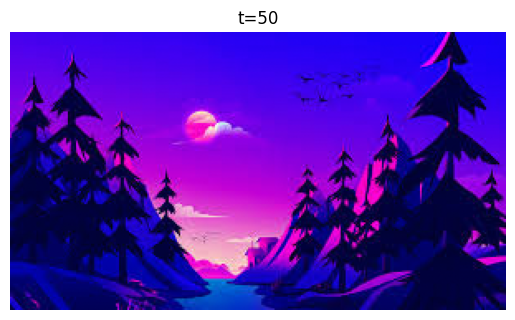

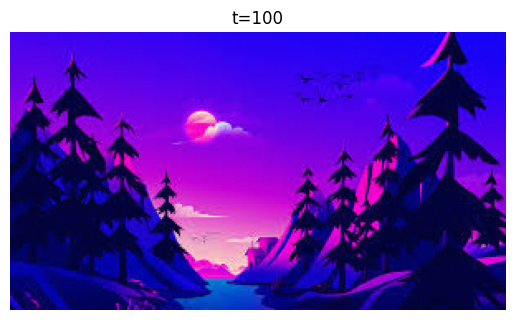

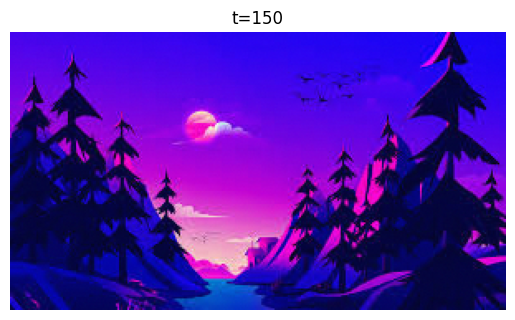

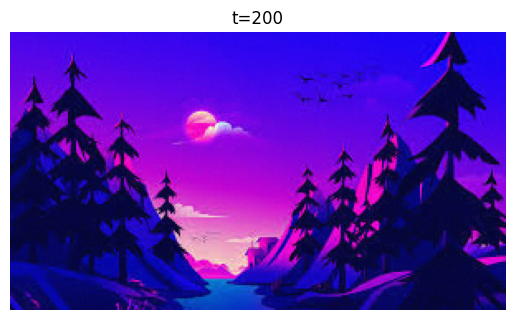

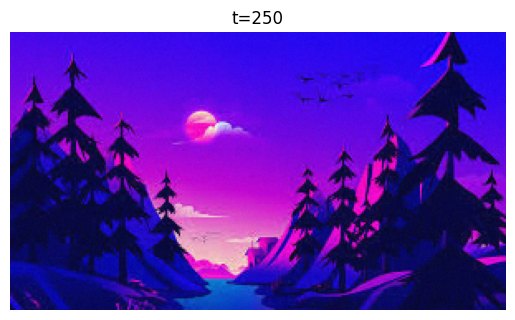

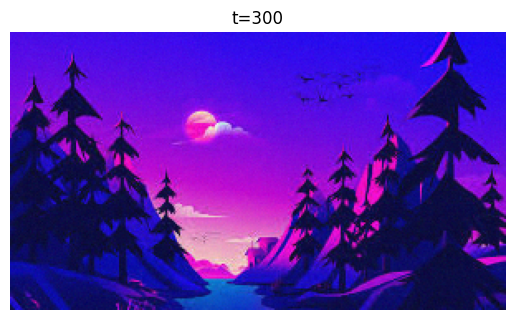

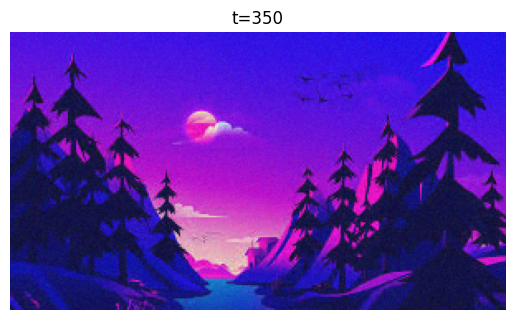

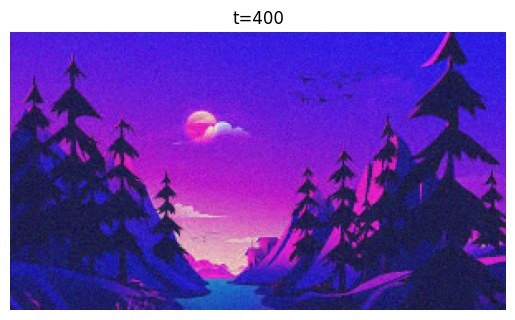

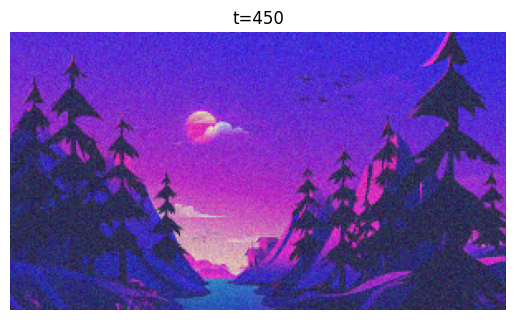

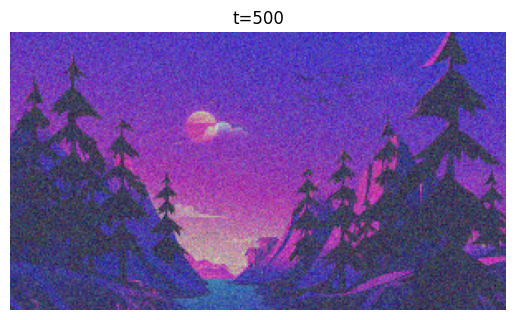

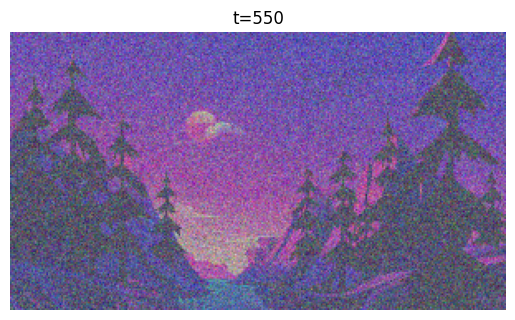

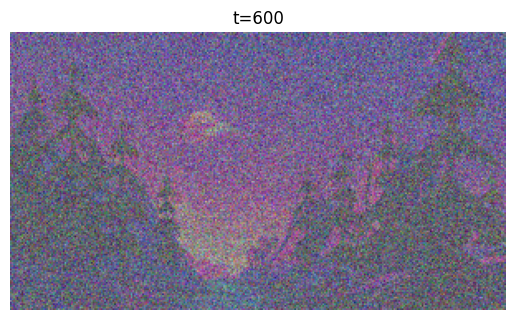

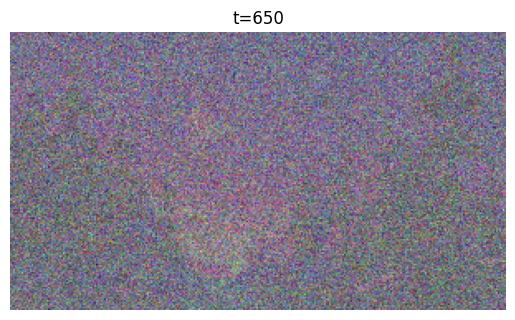

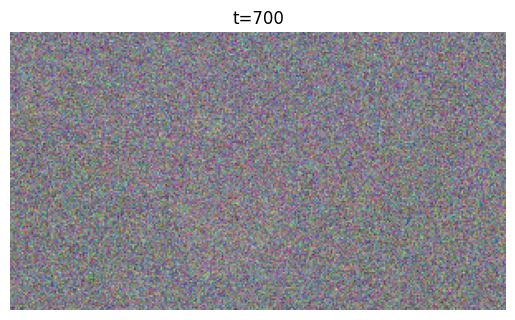

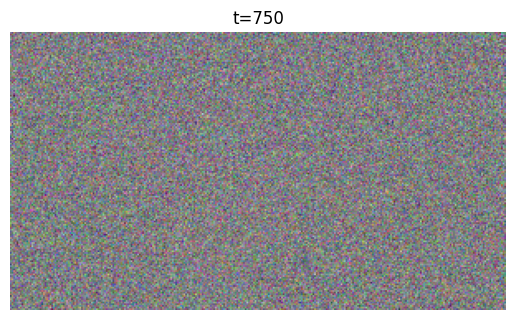

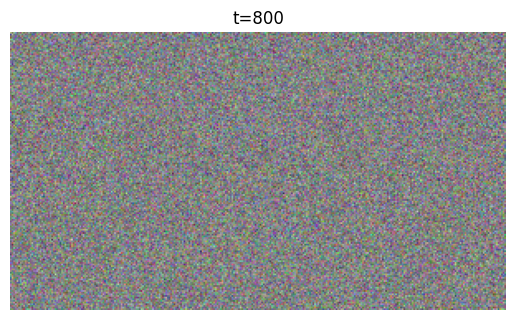

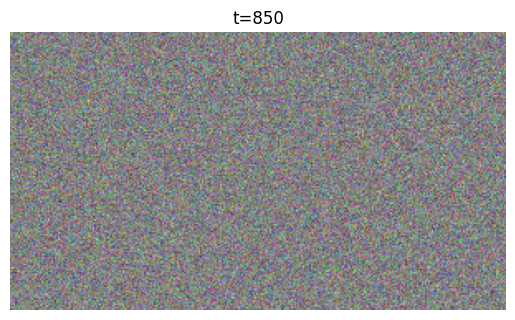

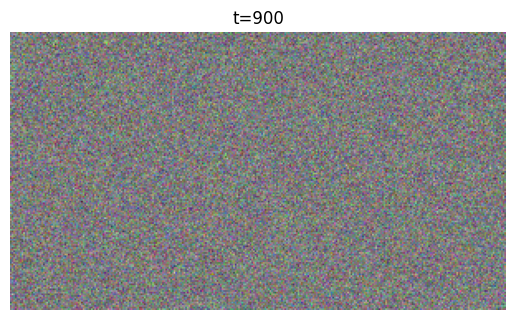

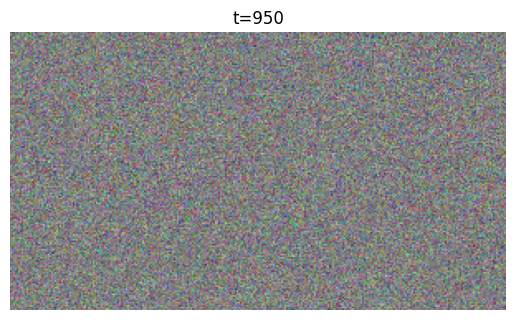

In [7]:
time_steps = [t for t in range(T)]
# for t in time_steps:
#     if t%20 ==0:
#         epsilon = np.random.randn(*image.shape)
#         x = np.sqrt(alpha_product[t])*image + np.sqrt(1-alpha_product[t])*epsilon
#         x = x / 255.0
#         plt.imshow(x)

for t in range(T):
    if t % 50 == 0:
        epsilon = np.random.randn(*image.shape)
        
        x = np.sqrt(alpha_product[t]) * image + np.sqrt(1 - alpha_product[t]) * epsilon
        x = (x - x.min()) / (x.max() - x.min())

        plt.figure()
        plt.imshow(x.squeeze(), cmap="gray")
        plt.title(f"t={t}")
        plt.axis("off")
        plt.show()

        
        
        

   

In [7]:
#  gif 
import imageio

frames = []

for t in range(T):
    if t % 50 == 0:
        epsilon = np.random.randn(*image.shape)
        x = np.sqrt(alpha_product_cosine[t]) * image + np.sqrt(1 - alpha_product_cosine[t]) * epsilon
        
        # normalize ONLY for visualization
        x = (x - x.min()) / (x.max() - x.min())

        fig, ax = plt.subplots()
        ax.imshow(x.squeeze(), cmap="gray")
        ax.set_title(f"t={t}")
        ax.axis("off")

        # render figure to image array
        fig.canvas.draw()
        frame = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
        frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (4,))
        frames.append(frame)

        plt.close(fig)  # VERY important (memory leak otherwise)


In [8]:
imageio.mimsave("forward_diffusion_cosine.gif", frames, fps=4 , loop=0)
